# Обзор OpenCV 

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
import PIL.Image as Image
import os
%matplotlib inline

# Каскады Хаара и LBP

In [173]:
cascades_path = list(map(lambda i: path_name + "\\" + i, os.listdir('data')))
os.listdir('data')

['haarcascade_frontalface_alt.xml',
 'haarcascade_frontalface_alt2.xml',
 'haarcascade_frontalface_alt_tree.xml',
 'haarcascade_frontalface_default.xml',
 'lbpcascade_frontalface.xml',
 'lbpcascade_frontalface_improved.xml']

In [44]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [43]:
test_image = cv2.imread('Images\\test.jpg')

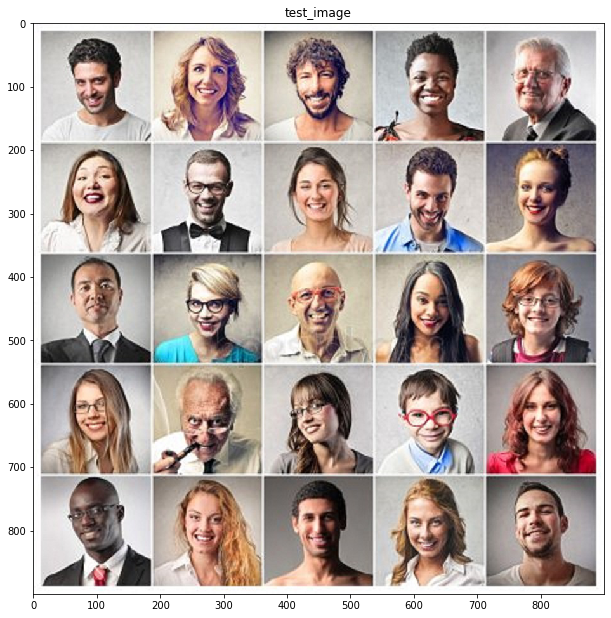

In [47]:
fig,ax = plt.subplots(1)
fig.set_size_inches(18.5, 10.5)

ax.set_title('test_image')
ax.imshow(convertToRGB(test_image))
plt.show()

In [107]:
def detect_faces(cascade, colored_img, scaleFactor=1.1):

    img_copy = np.copy(colored_img)

    # convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    # let's detect multiscale (some images may be closer to camera than others) images
    faces = cascade.detectMultiScale(
        gray, scaleFactor=scaleFactor, minNeighbors=5)

    # go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return img_copy, len(faces)

In [160]:
def test_cascades(cascades_path, img=test_image):
    result_map = {}
    num_faces = {}
    for cascade_path in cascades_path:
        cascade_name = cascade_path.split('\\')[1].split('.')[0]
        cascade = cv2.CascadeClassifier(cascade_path)
        faces, len_faces = detect_faces(cascade, img)
        num_faces.update({cascade_name : len_faces})
        result_map.update({cascade_name: faces})
    num_faces = sorted(num_faces.items(), key=lambda kv: kv[1])
    num_faces.reverse()
    return result_map, dict(num_faces)

In [161]:
results, num_faces = test_cascades(cascades_path)

In [171]:
fig = plt.figure()
fig.set_size_inches(100, 200)
img = convertToRGB(test_image)

i = 1

for cascade in num_faces:    
    ax = fig.add_subplot(3, 2, i)
    ax.set_title(cascade + ', ' + str(num_faces[cascade]) + ' faces', fontsize=60)
    ax.imshow(convertToRGB(results[cascade]))
    i += 1

plt.show()